<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/basic_drawing_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this notebook, we are going to see how to draw several figures: lines, circles, rectangles, polygonal curves, among others. More specifically we will see the following functions: `cv2.line()`, `cv2.rectangle()`, `cv2.circle()`, `cv2.clipLine()`, `cv2.arrowedLine()`, `cv2.polylines()`, `cv2.fillPoly()`.

# Basic drawing: lines, rectangles and circles



## Introduction to basic drawing with OpenCV

Drawing functions in OpenCV usually have the following parameters in common:

*   **img**: image on which you want to draw, it is always the first one we indicate.
*   **color**: color the figure should be painted in.
*   **thickness**: thickness of the outline of the figure, `-1` fills the figure, the default value is `1`.
*   **lineType**: define the line type, by default it is `cv2.LINE_8`, the option `cv2.LINE_AA` uses anti-aliased so the result will be better, you can also use `cv2.LINE_4`.

In this section we will see some basic drawing, including lines, rectangles and circles. We first define a function, which creates the canvas to draw: `400x400` pixels, `3` channels, `uint8` (8-bit unsigned integers). We set the background to black using `np.zeros()`:

In [1]:
import numpy as np

def create_canvas():
  canvas = np.zeros((400, 400, 3), dtype="uint8")
  return canvas

We are going to see how `cv2.line()`, `cv2.rectangle()`, and `cv2.circle()` works. We are going to draw:

*   A red line starting at `(0,0)` and ending at `(400,400)` with a thickness of `3` pixels.
*   A magenta rectangle with a top left point at `(10, 50)` and a bottom right point at `(50, 380)` with a thickness of `3` pixels
*   A filled blue rectangle with a top left point at `(100, 300)` and a bottom right point `(150, 350)` with a thickness of `3` pixels
*   A cyan circle centered at `(150, 350)` with a radius of `50` pixels




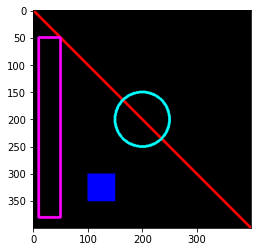

In [2]:
import cv2
from matplotlib import pyplot as plt

image = create_canvas()
cv2.line(image, (0, 0), (400, 400), (0, 0, 255), 3)
cv2.rectangle(image, (10, 50), (50, 380), (255, 0, 255), 3)
cv2.rectangle(image, (100, 300), (150, 350), (255, 0, 0), -1)
cv2.circle(image, (200, 200), 50, (255, 255, 0), 3)

plt.imshow(image[:, :, ::-1])

## More basic drawing examples

We are going to execute the script `basic_drawing.py` (from here: https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter04/01-chapter-content/basic_drawing.py). See "**explore_and_execute_external_scripts_in_colab.ipynb**" for more information about how to execute external scripts, where the function `download_and_execute_file()` was introduced.

In [3]:
import requests

# https://stackoverflow.com/questions/14409167/how-to-pass-a-variable-to-magic-%C2%B4run%C2%B4-function-in-ipython
def download_and_execute_file(fname, url, params="", execute=True, show_content=False):
  # Download and write the file:
  r = requests.get(url)
  open(fname , 'wb').write(r.content)

  # Show the content of the script if required:
  if show_content:
    print("\n")
    with open(fname,'r') as testwritefile:
      print(testwritefile.read())
    print("\n")

  # Execute the script if required:
  if execute:    
    execution = "run " + fname + " " + params
    ipy = get_ipython()
    ipy.magic(execution)



"""
Example to show how to draw basic shapes using OpenCV
"""

# Import required packages:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_with_matplotlib(img, title):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()


# Dictionary containing some colors:
colors = {'blue': (255, 0, 0), 'green': (0, 255, 0), 'red': (0, 0, 255), 'yellow': (0, 255, 255),
          'magenta': (255, 0, 255), 'cyan': (255, 255, 0), 'white': (255, 255, 255), 'black': (0, 0, 0),
          'gray': (125, 125, 125), 'rand': np.random.randint(0, high=256, size=(3,)).tolist(),
          'dark_gray': (50, 50, 50), 'light_gray': (220, 220, 220)}

# We create the canvas to draw: 400 x 400 pixels, 3 channels, uint8 (8-bit unsigned integers)
# We set the background to black using np.zeros():
image = np.zeros((400, 400, 3), dtyp

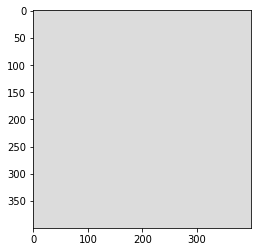

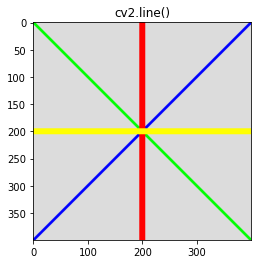

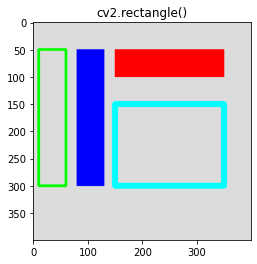

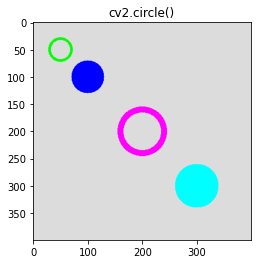

<Figure size 432x288 with 0 Axes>

In [4]:
fname = "basic_drawing.py"
url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter04/01-chapter-content/basic_drawing.py"
download_and_execute_file(fname, url, params= "", execute=True, show_content=True)

# Basic drawing: clip lines, arrowed lines, ...

The signature for the `cv2.clipLine()` function is as follows:
```
retval, pt1, pt2 = clipLine(imgRect, pt1, pt2)
```
The `cv2.clipLine()` function returns the segment (defined by the `pt1` and `pt2` output points) inside the rectangle (the function clips the segment against the defined rectangle). In this sense, `retval` is `False`, if the two original `pt1` and `pt2` points are both outside the rectangle. Otherwise (some of the two `pt1` or `pt2` points are inside the rectangle) this function returns `True`.

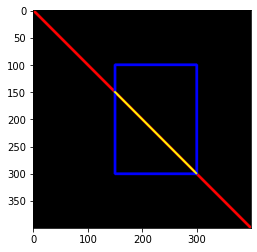

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = create_canvas()

# Draw a rectangle and a line:
cv2.line(image, (0, 0), (400, 400), (0,0,255), 3)
cv2.rectangle(image, (150, 100), (300, 300), (255,0,0), 3)

# Rectangle is (x0, y0, width, height) in OpenCV:
rect = (150, 100, 150, 200)

# We call the function cv2.clipLine():
ret, p1, p2 = cv2.clipLine(rect, (0, 0), (400, 400))

# cv2.clipLine() returns False if the line is outside the rectangle; returns True otherwise
if ret:
    cv2.line(image, p1, p2, colors['yellow'], 3)

plt.imshow(image[:, :, ::-1])

`cv2.arrowedLine()` method is used to draw arrow segment pointing from the start point to the end point. The signature of this function is:
```
cv.arrowedLine(img, pt1, pt2, color[, thickness[, line_type[, shift[, tipLength]]]])
```
We can change length of the arrow tip in relation with the arrow length with the parameter `tipLength`.

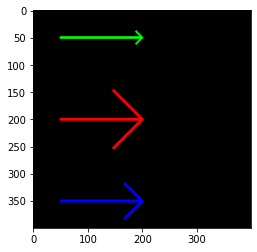

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = create_canvas()

cv2.arrowedLine(image, (50, 50),  (200, 50),  (0, 255, 0) , 3)
cv2.arrowedLine(image, (50, 200), (200, 200), (0, 0, 255) , 3, cv2.LINE_AA, 0, 0.5)
cv2.arrowedLine(image, (50, 350), (200, 350), (255, 0, 0) , 3, cv2.LINE_AA, 0, 0.3)

plt.imshow(image[:, :, ::-1])

We can draw several polygonal curves using `cv2.polylines()`. We must create a set of points that define the figure; these points will be joined using lines, so we can create complex figures. 
The signature of this function is:
```
cv2.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]])
```
`isClosed` flag indicates whether the drawn polylines are closed or not. If they are closed, the function draws a line from the last vertex of each curve to its first vertex. `pts` is the array of points to be drawn.

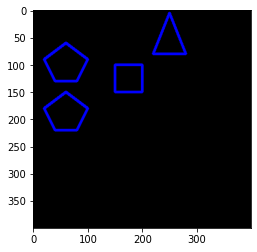

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = create_canvas()

pts = np.array([[20, 90], [60, 60], [100, 90], [80, 130], [40, 130]], np.int32)
pts2 = np.array([[20, 180], [60, 150], [100, 180], [80, 220], [40, 220]], np.int32)
pts3 = np.array([[150, 100], [200, 100], [200, 150], [150, 150]], np.int32)
pts4 = np.array([[250, 5], [220, 80], [280, 80]], np.int32)

cv2.polylines(image, [pts, pts2, pts3, pts4], True, (255,0,0), 3)

plt.imshow(image[:, :, ::-1])

If we want to draw a filled  figure we must use `cv2.fillPoly().` This function is similarly used as the previous one with the difference that the inside of the figure is filled.

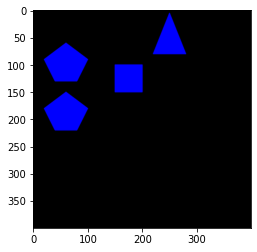

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = create_canvas()

pts = np.array([[20, 90], [60, 60], [100, 90], [80, 130], [40, 130]], np.int32)
pts2 = np.array([[20, 180], [60, 150], [100, 180], [80, 220], [40, 220]], np.int32)
pts3 = np.array([[150, 100], [200, 100], [200, 150], [150, 150]], np.int32)
pts4 = np.array([[250, 5], [220, 80], [280, 80]], np.int32)

cv2.fillPoly(image, [pts, pts2, pts3, pts4], (255,0,0), cv2.LINE_AA)

plt.imshow(image[:, :, ::-1])

## More examples involving clip lines, arrowed lines, polylines, ...

We are going to execute the script `basic_drawing_2.py` (from here: https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter04/01-chapter-content/basic_drawing_2.py). See "**explore_and_execute_external_scripts_in_colab.ipynb**" for more information about how to execute external scripts and where the function `download_and_execute_file()` was introduced.



"""
Example to show how to draw basic shapes using OpenCV (2)
"""

# Import required packages:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_with_matplotlib(img, title):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()


# Dictionary containing some colors:
colors = {'blue': (255, 0, 0), 'green': (0, 255, 0), 'red': (0, 0, 255), 'yellow': (0, 255, 255),
          'magenta': (255, 0, 255), 'cyan': (255, 255, 0), 'white': (255, 255, 255), 'black': (0, 0, 0),
          'gray': (125, 125, 125), 'rand': np.random.randint(0, high=256, size=(3,)).tolist(),
          'dark_gray': (50, 50, 50), 'light_gray': (220, 220, 220)}

# We create the canvas to draw: 300 x 300 pixels, 3 channels, uint8 (8-bit unsigned integers)
# We set background to black using np.zeros():
image = np.zeros((300, 300, 3), dtyp

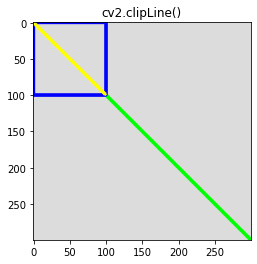

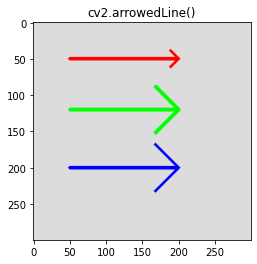

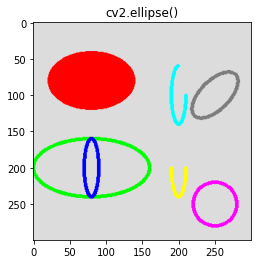

shape of pts '(3, 1, 2)'
shape of pts '(3, 1, 2)'
shape of pts '(5, 1, 2)'
shape of pts '(5, 1, 2)'
shape of pts '(4, 1, 2)'
shape of pts '(4, 1, 2)'


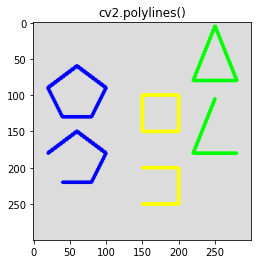

<Figure size 432x288 with 0 Axes>

In [ ]:
fname = "basic_drawing_2.py"
url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter04/01-chapter-content/basic_drawing_2.py"
download_and_execute_file(fname, url, params= "", execute=True, show_content=True)

# Conclusions

In this notebook, we have seen how to draw basic figures. In summary, we have seen the following functions:

*   `cv2.line()`
*   `cv2.rectangle()`
*   `cv2.circle()`
*   `cv2.clipLine()`
*   `cv2.arrowedLine()`
*   `cv2.polylines()`
*   `cv2.fillPoly()`

